In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('Reliance.csv')

In [3]:
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0
...,...,...,...,...,...,...,...
1228,2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
1229,2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
1230,2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0
1231,2020-11-13,1982.000000,2036.650024,1981.750000,1996.400024,1996.400024,20946864.0


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1233 non-null   object 
 1   Open       1232 non-null   float64
 2   High       1232 non-null   float64
 3   Low        1232 non-null   float64
 4   Close      1232 non-null   float64
 5   Adj Close  1232 non-null   float64
 6   Volume     1232 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.6+ KB


In [6]:
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [7]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1233 entries, 2015-11-18 to 2020-11-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1232 non-null   float64
 1   High       1232 non-null   float64
 2   Low        1232 non-null   float64
 3   Close      1232 non-null   float64
 4   Adj Close  1232 non-null   float64
 5   Volume     1232 non-null   float64
dtypes: float64(6)
memory usage: 67.4 KB


In [9]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0
...,...,...,...,...,...,...
2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0


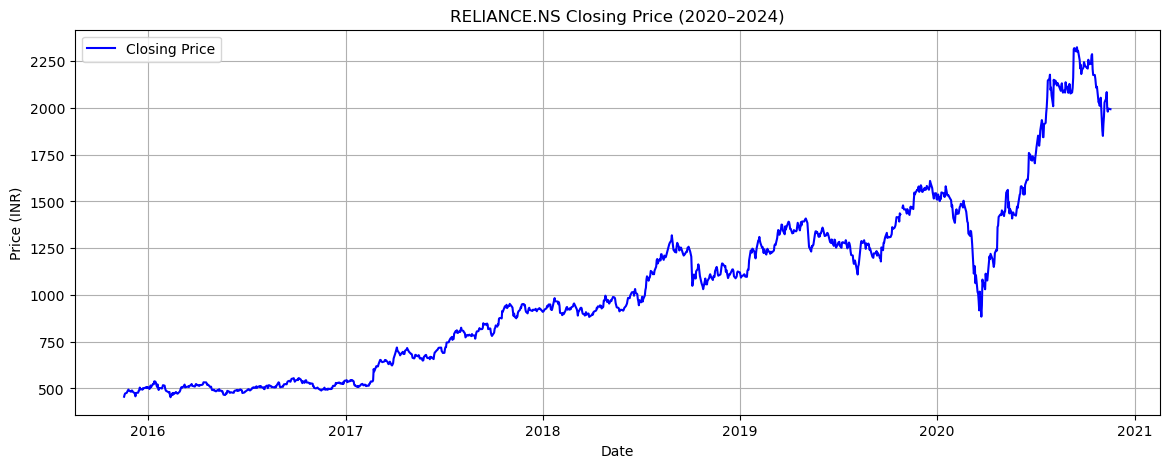

In [10]:
plt.figure(figsize=(14,5))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.title("RELIANCE.NS Closing Price (2020–2024)")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.legend()
plt.show()

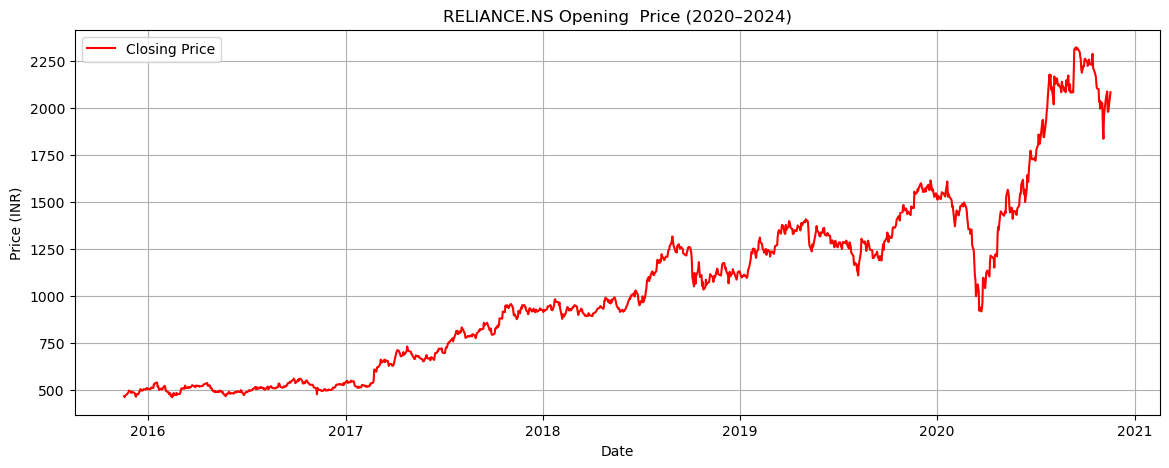

In [11]:
plt.figure(figsize=(14,5))
plt.plot(df['Open'],label='Closing Price',color='Red')
plt.title("RELIANCE.NS Opening  Price (2020–2024)")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.legend()
plt.show()


ADX AND MACD OR EMA STARTEGY

In [12]:
# EMA
df['EMA12'] = df['Close'].ewm(span=12).mean()
df['EMA26'] = df['Close'].ewm(span=26).mean()

# MACD
df['MACD'] = df['EMA12'] - df['EMA26']
df['Signal'] = df['MACD'].ewm(span=9).mean()



# ADX
import ta
df['ADX'] = ta.trend.adx(df['High'], df['Low'], df['Close'], window=14)


In [13]:
# USE OF RSI INDICATOR TO INCREASE SHARPE RATIO AND FILTER SIGNAL

# Calculate RSI
df['RSI'] = ta.momentum.rsi(df['Close'], window=14)

df['Signal_Position'] = 0  

#  Buy WHEN  MACD cross up, ADX > 20, RSI < 70
buy_signal = (
    (df['MACD'] > df['Signal']) &
    (df['MACD'].shift(1) <= df['Signal'].shift(1)) &
    (df['ADX'] > 20) &
    (df['RSI'] < 70)
)

#  Sell WHEN  MACD cross down, ADX > 20, RSI > 30
sell_signal = (
    (df['MACD'] < df['Signal']) &
    (df['MACD'].shift(1) >= df['Signal'].shift(1)) &
    (df['ADX'] > 20) &
    (df['RSI'] > 40)
)

df.loc[buy_signal, 'Signal_Position'] = 1
df.loc[sell_signal, 'Signal_Position'] = -1


In [14]:
## CUSTOM TESTING

initial_cash = 100000
cash = initial_cash
position = 0
portfolio_value = []

df['Strategy_Return'] = 0.0  

for i in range(1, len(df)):
    price = df['Close'].iloc[i]
    signal = df['Signal_Position'].iloc[i]

    if signal == 1 and position == 0:        # Buy signal
        position = cash / price
        cash = 0
    elif signal == -1 and position > 0:      # Sell signal
        cash = position * price
        position = 0

    total_value = cash + position * price
    portfolio_value.append(total_value)
    df.at[df.index[i], 'Strategy_Return'] = total_value

# Forward fill the rest
df['Strategy_Return'] = df['Strategy_Return'].ffill()


In [16]:
## Cumulative Return
initial_investment = 100000
final_value = df['Strategy_Return'].iloc[-1]
cumulative_return = (final_value - initial_investment) / initial_investment
print("Cumulative Return: {:.2f}%".format(cumulative_return * 100))


Cumulative Return: 113.12%


In [18]:
## Annualized Return
days_held = (df.index[-1] - df.index[0]).days

annualized_return = (1 + cumulative_return) ** (365 / days_held) - 1
print("Annualized Return: {:.2f}%".format(annualized_return * 100))


Annualized Return: 16.33%


In [19]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'EMA12', 'EMA26',
       'MACD', 'Signal', 'ADX', 'RSI', 'Signal_Position', 'Strategy_Return'],
      dtype='object')

In [20]:
df['Strategy_Return'].unique()

array([     0.        , 100000.        , 100315.90585207,  99415.56911918,
       100073.70631099, 101790.13316173, 103332.80294847, 105459.90361603,
       106655.07822911, 105975.88570166, 108145.10335862, 109693.03697927,
       106539.2486106 , 106828.828975  , 107381.66421612, 107460.64067914,
       107592.2681175 , 106986.78190103, 108166.15869427, 109229.71850522,
       110340.64650326, 108376.76259565, 107450.11301132, 109119.14640251,
       110256.41252445, 110061.59380669, 108929.59783677, 108992.78911617,
       108859.87241327, 106053.39364129, 105400.5565078 , 104220.00544105,
       103757.57913816, 104045.91815013, 104415.86180379, 103888.14787053,
       103915.34941776, 103811.98223261, 105667.13297631, 106271.00601912,
       106749.74933332, 106222.04192843, 107130.57099453, 106227.48093221,
       106075.15618475, 107739.88956947, 107402.58646681, 106684.46823132,
       106679.02922755, 103523.64974901, 103980.63704813, 104214.56643727,
       105204.70667343, 1

In [21]:
df['Daily_Returns'] = df['Strategy_Return'].pct_change()


In [22]:
df['Daily_Returns'].unique()
# '''Problem occur due to nan inf values we can not calculate sharpe ratio because of this 
#   unkown values so we want to remove this unkown value
# '''

array([            nan,             inf,  0.00000000e+00,  3.15905852e-03,
       -8.97501473e-03,  6.62006160e-03,  1.71516267e-02,  1.51553961e-02,
        2.05849508e-02,  1.13329765e-02, -6.36812179e-03,  2.04689741e-02,
        1.43134878e-02, -2.87510352e-02,  2.71806276e-03,  5.17496304e-03,
        7.35474381e-04,  1.22488976e-03, -5.62759971e-03,  1.10235748e-02,
        9.83264843e-03,  1.01705654e-02, -1.77983723e-02, -8.55026080e-03,
        1.55331004e-02,  1.04222417e-02, -1.76696043e-03, -1.02851134e-02,
        5.80111197e-04, -1.21949997e-03, -2.57806546e-02, -6.15574015e-03,
       -1.12006151e-02, -4.43702052e-03,  2.77896819e-03,  3.55558065e-03,
       -5.05396330e-03,  2.61834943e-04, -9.94724896e-04,  1.78702950e-02,
        5.71486162e-03,  4.50492879e-03, -4.94340650e-03,  8.55311242e-03,
       -8.42980723e-03, -1.43394860e-03,  1.56939046e-02, -3.13071699e-03,
       -6.68622851e-03, -5.09821520e-05, -2.95782545e-02,  4.41432755e-03,
        2.24973991e-03,  

In [23]:
df['Daily_Returns'] = df['Daily_Returns'].fillna(0)
df['Daily_Returns'] = df['Daily_Returns'].replace([np.inf, -np.inf], 0)


In [24]:
df['Daily_Returns'].unique()
## Unkown values are removed

array([ 0.00000000e+00,  3.15905852e-03, -8.97501473e-03,  6.62006160e-03,
        1.71516267e-02,  1.51553961e-02,  2.05849508e-02,  1.13329765e-02,
       -6.36812179e-03,  2.04689741e-02,  1.43134878e-02, -2.87510352e-02,
        2.71806276e-03,  5.17496304e-03,  7.35474381e-04,  1.22488976e-03,
       -5.62759971e-03,  1.10235748e-02,  9.83264843e-03,  1.01705654e-02,
       -1.77983723e-02, -8.55026080e-03,  1.55331004e-02,  1.04222417e-02,
       -1.76696043e-03, -1.02851134e-02,  5.80111197e-04, -1.21949997e-03,
       -2.57806546e-02, -6.15574015e-03, -1.12006151e-02, -4.43702052e-03,
        2.77896819e-03,  3.55558065e-03, -5.05396330e-03,  2.61834943e-04,
       -9.94724896e-04,  1.78702950e-02,  5.71486162e-03,  4.50492879e-03,
       -4.94340650e-03,  8.55311242e-03, -8.42980723e-03, -1.43394860e-03,
        1.56939046e-02, -3.13071699e-03, -6.68622851e-03, -5.09821520e-05,
       -2.95782545e-02,  4.41432755e-03,  2.24973991e-03,  9.50097736e-03,
        2.32702445e-03,  

In [25]:
df['Daily_Returns'].describe()

count    1233.000000
mean        0.000659
std         0.009623
min        -0.041850
25%         0.000000
50%         0.000000
75%         0.000000
max         0.109631
Name: Daily_Returns, dtype: float64

In [26]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'EMA12', 'EMA26',
       'MACD', 'Signal', 'ADX', 'RSI', 'Signal_Position', 'Strategy_Return',
       'Daily_Returns'],
      dtype='object')

In [47]:
# Sharpe ratio
sharpe_ratio = (df['Daily_Returns'].mean() / df['Daily_Returns'].std()) * (252**0.5)
print("Sharpe Ratio: {:.2f}".format(sharpe_ratio))


Sharpe Ratio: 1.09


In [48]:
# Smoothed Sharpe Ratio 
daily_returns_smoothed = df['Daily_Returns'].rolling(window=5).mean().dropna()
mean_smoothed = daily_returns_smoothed.mean()
std_smoothed = daily_returns_smoothed.std()
sharpe_smoothed = (mean_smoothed / std_smoothed) * (252 ** 0.5)


print(f"Smoothed Sharpe Ratio: {sharpe_smoothed:.2f}")


Smoothed Sharpe Ratio: 2.33


In [49]:
# Maximum Drawdown
rolling_max = df['Strategy_Return'].cummax()
drawdown = (df['Strategy_Return'] - rolling_max) / rolling_max
max_drawdown = drawdown.min()
print("Maximum Drawdown: {:.2f}%".format(max_drawdown * 100))


Maximum Drawdown: -23.44%


In [51]:
# Sornito ratio
downside_std = df[df['Daily_Returns'] < 0]['Daily_Returns'].std()
sortino_ratio = (df['Daily_Returns'].mean() / downside_std) * (252**0.5)
print("Sortino Ratio: {:.2f}".format(sortino_ratio))


Sortino Ratio: 1.25


In [52]:
# Win rate
df['Signal_Shifted'] = df['Signal_Position'].shift()
trade_returns = df[df['Signal_Shifted'] != 0]['Daily_Returns']
win_rate = len(trade_returns[trade_returns > 0]) / len(trade_returns)
print("Win Rate: {:.2f}%".format(win_rate * 100))


Win Rate: 22.50%


In [54]:
# Profit Factor
avg_profit = trade_returns[trade_returns > 0].mean()
avg_loss = abs(trade_returns[trade_returns < 0].mean())
profit_factor = avg_profit / avg_loss
# print("avg_profit: {:.2f}".format(avg_profit))
# print("avg_loss: {:.2f}".format(avg_loss))
print("Profit Factor: {:.2f}".format(profit_factor))


Profit Factor: 1.26


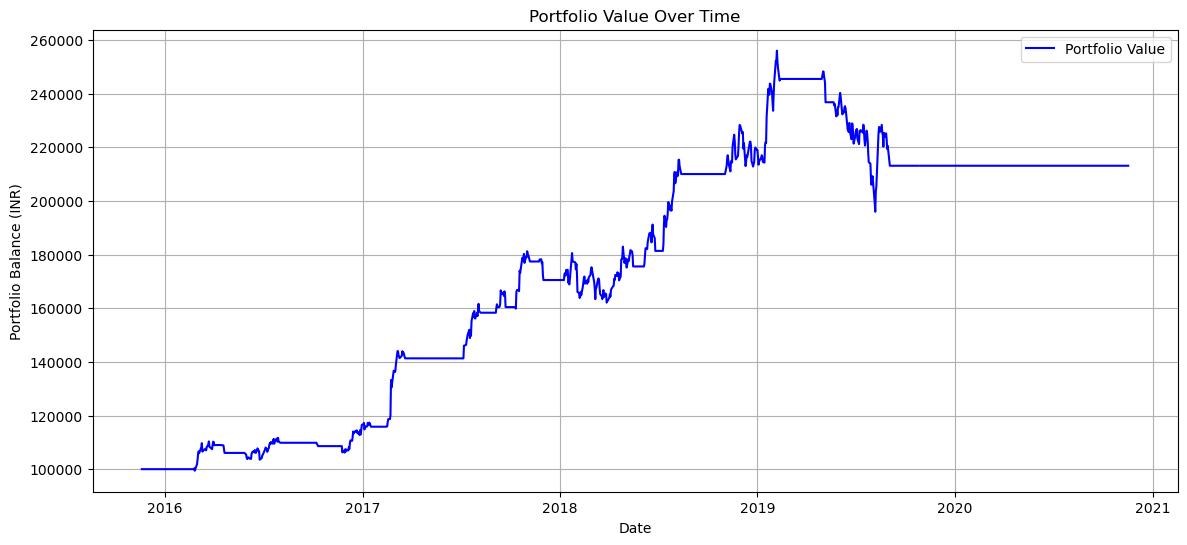

In [17]:
plt.figure(figsize=(14,6))
plt.plot(df.index[1:], portfolio_value, label='Portfolio Value', color='blue')
plt.title("Portfolio Value Over Time")
plt.xlabel("Date")
plt.ylabel("Portfolio Balance (INR)")
plt.grid(True)
plt.legend()
plt.show()


In [27]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'EMA12', 'EMA26',
       'MACD', 'Signal', 'ADX', 'RSI', 'Signal_Position', 'Strategy_Return',
       'Daily_Returns'],
      dtype='object')

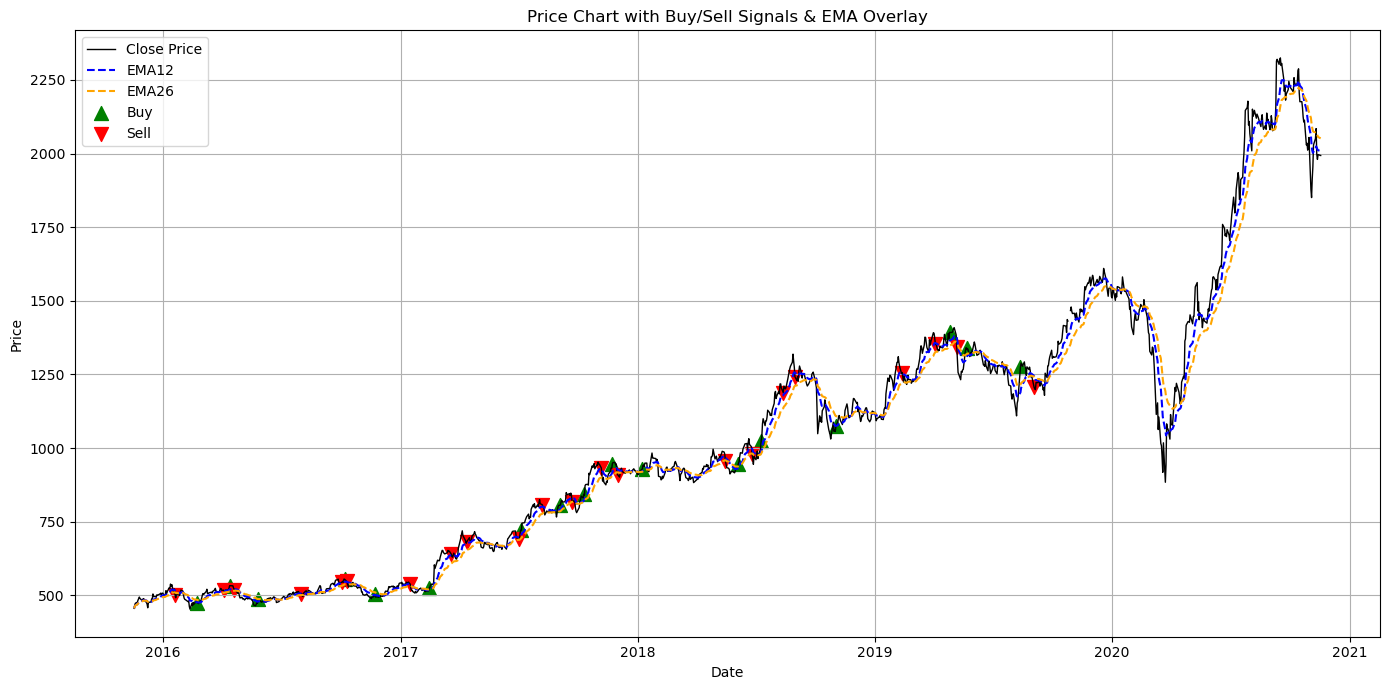

In [30]:
plt.figure(figsize=(14, 7))

# Plot price and EMAs
plt.plot(df.index, df['Close'], label='Close Price', color='black', linewidth=1)
plt.plot(df.index, df['EMA12'], label='EMA12', color='blue', linestyle='--')
plt.plot(df.index, df['EMA26'], label='EMA26', color='orange', linestyle='--')

# Buy/Sell markers
buy_signals = df[df['Signal_Position'] == 1]
sell_signals = df[df['Signal_Position'] == -1]

plt.scatter(buy_signals.index, buy_signals['Close'], label='Buy', marker='^', color='green', s=100)
plt.scatter(sell_signals.index, sell_signals['Close'], label='Sell', marker='v', color='red', s=100)

plt.title('Price Chart with Buy/Sell Signals & EMA Overlay')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


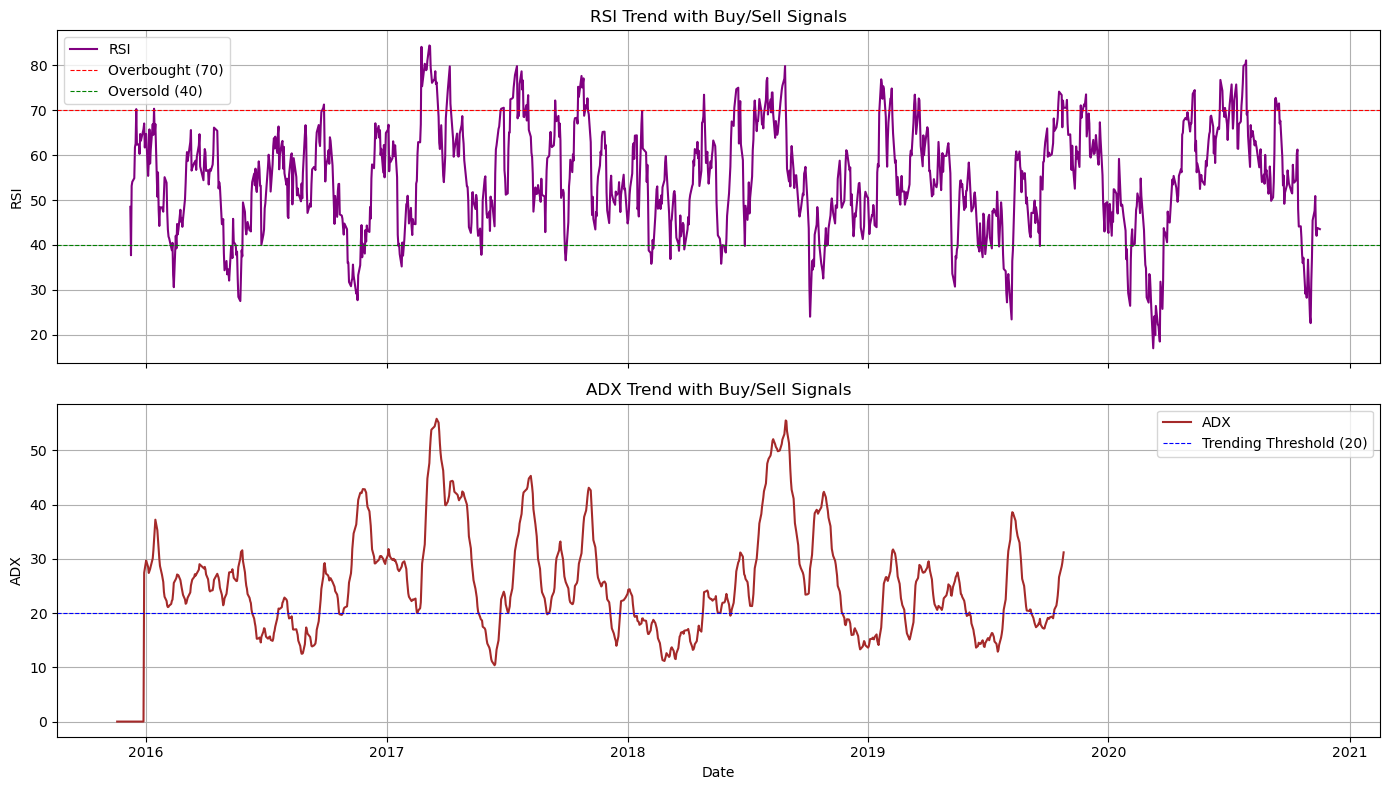

In [34]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Plot RSI 
ax1.plot(df.index, df['RSI'], label='RSI', color='purple')
ax1.axhline(70, color='red', linestyle='--', linewidth=0.8, label='Overbought (70)')
ax1.axhline(40, color='green', linestyle='--', linewidth=0.8, label='Oversold (40)')
ax1.set_ylabel('RSI')
ax1.set_title('RSI Trend with Buy/Sell Signals')
ax1.legend()
ax1.grid(True)

# Plot ADX 
ax2.plot(df.index, df['ADX'], label='ADX', color='brown')
ax2.axhline(20, color='blue', linestyle='--', linewidth=0.8, label='Trending Threshold (20)')
ax2.set_ylabel('ADX')
ax2.set_title('ADX Trend with Buy/Sell Signals')
ax2.legend()
ax2.grid(True)

# Shared X-axis (Date)
plt.xlabel('Date')
plt.tight_layout()
plt.show()
